Tensores y Variables en TensorFlow 2.4
===

* 30:00 min | Última modificación: Mayo 10, 2021 | [YouTube]

Adaptado de:

* https://www.tensorflow.org/tutorials/keras/keras_tuner

Esta lección presenta una introducción al cómputo numérico usando la API de bajo nivel de TensorFlow, a partir de la cual se construiran modelos de aprendizaje automático en lecciones posteriores. El lector puede referirse a los sitios de oficiales de Keras (https://keras.io) y TensorFlow (https://www.tensorflow.org) para mayor información y para obtener una visión más profunda de las herramientas y metodologías disponibles.

## Representación de cómputos mediante su árbol sintáctico.

En el siguiente ejemplo se evaluará la expresión 5 * 3 - (3 + 2). Esta expresión puede ser representada a través del siguiente árbol sintáctico donde los nodos interiores representan las operaciones aritméticas y los nodos finales representan las constantes numéricas:

     [-]
      +--- [*]
      |     +---- [5]
      |     +---- [3]
      |
      +--- [+]
            +---- [3]
            +---- [2]

Note que en esta expresión el nodo con la constante 3 es común a ambas ramas y podría representarse de forma optimizada como:

     [-]
      +--- [*]
      |     +---- [5]
      |     +-----------+
      |                 |
      +--- [+]         [3] 
            |           |
            +-----------+ 
            +---- [2]   

Si se tiene en cuenta que la constante 3 podría ser reemplazada por un cómputo complejo, se hace evidente que dicho cálculo sería realizado una sola vez con la consiguiente economía en el cómputo. 

## Gráficas computacionales en TensorFlow

El árbol sintáctico anterior es equivalente a una gráfica que representa los cómputos a realizar (gráfica computacional). Para realizar la representación usando TensorFlow, se debe construir explícitamente el grafo que representa el árbol anterior, para lo cual se enumeran los nodos de la siguiente forma:

     [-] (node6)
      +--- [*] (node4)
      |     +---- [5] (node1)
      |     +---------------------+
      |                           |
      +--- [+] (node5)           [3] (node3)
            |                     |
            +---------------------+ 
            +---- [2] (node2)

La gráfica computacional está conformado por:

* **Tensores**: Representa un vector de cualquier número de dimensiones. El rango (**rank**) es el número de dimensiones y la forma (**shape**) es una tupla de enteros indicando el tamaño en cada dimensión. Note que un escalar es un tensor de forma []. Corresponde a los nodos finales de la gráfica computacional.

* **Operaciones**: Representan los cálculos. Son los nodos internos de la gráfica computacional.

## Ejemplo de un cómputo

El código en Python que representa la gráfica computacional es el siguiente:

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
#
# Se importan las librerías
#
import numpy as np
import tensorflow as tf

tf.__version__, np.__version__

('2.4.1', '1.19.5')

In [3]:
node1 = tf.constant(5.0)           # Tensor []
node2 = tf.constant(2.0)           # Tensor []
node3 = tf.constant(3.0)           # Tensor []
node4 = tf.multiply(node1, node2)  # Operación
node5 = tf.add(node3, node2)       # Operación
node6 = tf.subtract(node4, node5)  # Operación

El código anterior representa el flujo de datos del cómputo, pero no realiza propiamente el cálculo. Por ejemplo, la variable `node1` contiene el objeto en memoria (Tensor):

In [4]:
node1

<tf.Tensor: shape=(), dtype=float32, numpy=5.0>

In [44]:
#
# Un escalar es un tensor de rank-0 
#
tf.constant(4)

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [45]:
#
# Un vector es equivalente a una lista de valores 
# y es un tensor de rank- (con un solo eje)
#
tf.constant([1., 2., 3., 4.])

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 2., 3., 4.], dtype=float32)>

In [46]:
#
# Una matriz es un tensor de rank-2 y tiene dos ejes
#
tf.constant(
    [
        [1., 2.],
        [3., 4.],
        [5., 6.],
    ],
)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float32)>

In [47]:
#
# Es posible crear un número arbitrario de ejes
#
tf.constant(
    [
        [
            [0, 1, 2, 3, 4],
            [5, 6, 7, 8, 9],
        ],
        [
            [10, 11, 12, 13, 14],
            [15, 16, 17, 18, 19],
        ],
        [
            [20, 21, 22, 23, 24],
            [25, 26, 27, 28, 29],
        ],
    ]
)

<tf.Tensor: shape=(3, 2, 5), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]], dtype=int32)>

## Evaluación usando numpy()

In [5]:
node6, node6.numpy()

(<tf.Tensor: shape=(), dtype=float32, numpy=5.0>, 5.0)

In [6]:
node4, node4.numpy()

(<tf.Tensor: shape=(), dtype=float32, numpy=10.0>, 10.0)

In [48]:
#
# Tambien es posible convertir a NumPy 
# usando np.array
#
np.array(node4)

array(10., dtype=float32)

**Actividad.---** Construya a mano el gráfico de flujo de datos de la expresión

$$-0.9 * 2^3 + 2.5 * 2^2 - 3.8 * 2 -4.3$$

**Actividad.---** Realice el cómputo anterior usando TensorFlow.

donde la parte superior corresponde a la grafica colapsada y la parte inferior a la gráfica expandida.

## Operaciones con escalares

En la sección anterior se presentaron algunas operaciones aritméticas con TensorFlow. A continuación se resumen las operaciones aritméticas más comunes (la lista completa de operadores puede ser consultada en https://www.tensorflow.org/api_guides/python/math_ops)

    Operacion               equivalente
    --------------------------------------
    tf.add(a, b)            a + b
    tf.multiply(a, b)       a * b
    tf.subtract(a, b)       a - b
    tf.divide(a, b)         a / b
    tf.pow(a, b)            a ** b
    tf.mod(a, b)            a % b
    
    tf.abs(a)               abs(a)
    tf.square(a)            a ** 2
    tf.sqrt(a)              sqrt(a)
    tf.exp(a)               exp(a)
    tf.negative(a)          -a
    tf.sigmoid(a)           1 / (1 + exp(-a))
    tf.sign                 sign(a)
    tf.maximum
    tf.minimum
    
    tf.logical_and(a, b)    a & b
    tf.logical_or(a, b)     a | b   
    tf.greater(a, b)        a > b
    tf.greater_equal(a, b)  a >= b
    tf.less_equal(a, b)     a <= b
    tf.less(a, b)           a < b
    tf.logical_not(a)       ~a 
    tf.equal(a, b)          a == b
    tf.not_equal            a != b
    


---
**Actividad.--** Compute las siguientes expresiones usando TensorFlow y use TensorBoard para visualizar las gráficas computacionales.

* $|3 - 4| - (4 - 3)$


* $\sqrt{3^2 - 4*3*1}$


* $\frac{1}{2}*3^2 - \frac{5*2 - \exp{(-2)}}{3^2}$

---

## Creación de matrices

TensorFlow también soporta una gran cantidad de operaciones matriciales. A continuación se presentan ejemplos de las más comunes.

In [7]:
#
# Creación un tensor de 2x2 con 0s
#
tf.zeros(shape=(2, 2)).numpy()

array([[0., 0.],
       [0., 0.]], dtype=float32)

In [8]:
#
# Creación de un tensor de 2x2 con 1s
#
tf.ones(shape=(2, 2)).numpy()

array([[1., 1.],
       [1., 1.]], dtype=float32)

In [14]:
#
# Creación de un tensor de 3x2 lleno de 4s.
#
tf.fill(dims=(3, 2), value=4,).numpy()

array([[4, 4],
       [4, 4],
       [4, 4]], dtype=int32)

In [10]:
#
# Creación de una matriz diagonal
#
tf.linalg.diag(
    [
        1.0,
        2.0,
        3.0,
        4.0,
    ]
).numpy()

array([[1., 0., 0., 0.],
       [0., 2., 0., 0.],
       [0., 0., 3., 0.],
       [0., 0., 0., 4.]], dtype=float32)

In [17]:
#
# Creación de un tensor constante a partir de
# una lista de listas que representa una matriz
#
tf.constant(
    value=[
        [1, 2, 3],
        [4, 5, 6],
    ]
).numpy()

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

In [18]:
#
# Creación de un tensor mezclando los elementos
# de un tensor constante
#
tf.random.shuffle(
    value=tf.constant(
        [
            1,
            2,
            3,
            4,
            5,
            6,
        ]
    )
).numpy()

array([5, 1, 3, 4, 6, 2], dtype=int32)

## Generación de matrices con aleatorios

In [11]:
#
# Creación de un tensor de 3x2 con números
# aleatorios normales estándar
#
tf.random.normal(
    shape=(3, 2),
    mean=0,
    stddev=1,
    seed=None,
).numpy()

array([[-0.2651804 ,  0.42558706],
       [ 0.37520844,  1.5612575 ],
       [ 0.2579123 ,  0.9017231 ]], dtype=float32)

In [12]:
#
# Creación de un tensor de 3x2 con aleatorios
# normales truncados
#
tf.random.truncated_normal(
    shape=(3, 2),
    mean=0,
    stddev=1,
    seed=None,
).numpy()

array([[ 0.09287316,  0.94429123],
       [-0.84406686,  0.32124898],
       [ 0.0421923 , -1.889966  ]], dtype=float32)

In [13]:
#
# Creación de un tensor de números
# aleatorios uniformes de 3x2
#
tf.random.uniform(
    shape=(3, 2),
    minval=0,
    maxval=1,
).numpy()

array([[0.9720522 , 0.10158372],
       [0.6503949 , 0.14192045],
       [0.26171792, 0.97592807]], dtype=float32)

## Creación de matrices con valores secuenciales

In [15]:
#
# Creación de un tensor de números reales
#  igualmente espaciados entre 0.0 y 1.0
#
tf.linspace(
    start=0.0,
    stop=1.0,
    num=11,
).numpy()

array([0.        , 0.1       , 0.2       , 0.3       , 0.4       ,
       0.5       , 0.6       , 0.7       , 0.8       , 0.90000004,
       1.        ], dtype=float32)

In [16]:
tf.range(
    start=0.0,
    limit=1.0,
    delta=0.1,
).numpy()

array([0.        , 0.1       , 0.2       , 0.3       , 0.4       ,
       0.5       , 0.6       , 0.70000005, 0.8000001 , 0.9000001 ],
      dtype=float32)

## NumPy ---> Tensor

In [19]:
#
# Creación de una matriz de numpy
#
a = np.ones((3, 3))

#
# Conversión de numpy a tensor
#
tf.convert_to_tensor(value=a).numpy()

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## Operaciones matriciales

In [20]:
#
# Creación de una matriz de numpy
#
a = np.ones((3, 3))

#
# Multiplicación por una constante en TF
#
tf.multiply(
    x=a,
    y=42,
).numpy()

array([[42., 42., 42.],
       [42., 42., 42.],
       [42., 42., 42.]])

In [24]:
#
# Creación de una matriz de numpy
#
a = np.ones((3, 4))
a

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

## Operaciones de reducción

In [25]:
#
# Suma de las columnas de un tensor
#
tf.reduce_sum(input_tensor=a, axis=0).numpy()

array([3., 3., 3., 3.])

In [26]:
tf.reduce_sum(input_tensor=a, axis=1).numpy()

array([4., 4., 4.])

In [27]:
#
# suma de todos los elementos de un tensor
#
tf.reduce_sum(input_tensor=a).numpy()

12.0

TensorFlow implementa las siguiente funciones para reducir un tensor (https://www.tensorflow.org/api_guides/python/math_ops#Reduction)

    tf.reduce_sum
    tf.reduce_prod
    tf.reduce_min
    tf.reduce_max
    tf.reduce_mean
    tf.reduce_all
    tf.reduce_any
    tf.reduce_logsumexp
    tf.count_nonzero
    tf.accumulate_n
    tf.einsum
    

## Dimensiones de un tensor

In [62]:
m = tf.constant([[1, 2, 3], [4, 5, 6]])

#
# Número de elementos por cada dimension
#
m.get_shape(), m.shape, m.shape.as_list()

(TensorShape([2, 3]), TensorShape([2, 3]), [2, 3])

In [59]:
#
# Tipo de datos
#
m.dtype

tf.int32

In [60]:
#
# Cantidad total de elementos
#
tf.size(m)

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [61]:
#
# Número de ejes
#
m.ndim

2

## Operaciones aritméticas

In [29]:
#
# Suma de dos tensores
#
a = m + m
a.numpy()

array([[ 2,  4,  6],
       [ 8, 10, 12]], dtype=int32)

In [50]:
tf.add(m, m).numpy()

array([[ 2,  4,  6],
       [ 8, 10, 12]], dtype=int32)

In [53]:
#
# Eleva los términos de la matriz
# al cuadrado
tf.multiply(m, m), m * m

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[ 1,  4,  9],
        [16, 25, 36]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[ 1,  4,  9],
        [16, 25, 36]], dtype=int32)>)

In [54]:
#
# matriz por su transpuesta
#
tf.matmul(m, tf.transpose(m)), m @ tf.transpose(m)

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[14, 32],
        [32, 77]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[14, 32],
        [32, 77]], dtype=int32)>)

In [31]:
#
# suma varios tensores elemento a elemento
#
#  |1  2|     |5  0|     |1  2|    |7  4|
#  |    |  +  |    |  +  |    |  = |    |
#  |3  4|     |0  6|     |3  4|    |6 14|
#
a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([[5, 0], [0, 6]])

(a + b + a).numpy()

array([[ 7,  4],
       [ 6, 14]], dtype=int32)

In [32]:
tf.math.accumulate_n([a, b, a]).numpy()

array([[ 7,  4],
       [ 6, 14]], dtype=int32)

In [33]:
#
# Suma varios tensores elemento a elemento
#
tf.math.add_n([a, b, a]).numpy()

array([[ 7,  4],
       [ 6, 14]], dtype=int32)

## Redimensionado

In [34]:
#
# Cambio de las dimensiones de un tensor
#
print(tf.reshape(tensor=m, shape=(1, 6)).numpy())

print("---")

print(tf.reshape(tensor=m, shape=(3, 2)).numpy())

[[1 2 3 4 5 6]]
---
[[1 2]
 [3 4]
 [5 6]]


## Argmax y argmin

In [35]:
#
# Búsqueda de la posición del valor máximo en un tensor
#
tf.argmax(tf.constant([1, 3, 2, 4, 0])).numpy()

3

In [36]:
#
# Búsqueda de la posición del valor mínimo en un tensor
#
tf.argmin(tf.constant([1, 3, 2, 4, 0])).numpy()

4

## Funciones

In [37]:
#
# Aplicación de una función a cada elemento de un tensor
# La función f() se aplica al argumento m.
#
f = lambda m: tf.cond(
    tf.greater_equal(m, 0.0),
    true_fn=lambda: tf.constant(1.0),
    false_fn=lambda: tf.constant(0.0),
)
#
# Define el tensor x
#
x = tf.constant([10.0, -1.0])

#
# aplica la función f a cada elemento de x
#
y = tf.map_fn(f, x)

#
# Realiza el cómputo
#
y.numpy()

array([1., 0.], dtype=float32)

**Actividad.---** Para las matrices

$$\mathbf{X} =
\left[
  \begin{array}{cc}
     1.0 & 2.1 \\
     1.9 & 3.2 \\
     3.0 & 3.9 \\
     4.2 & 5.2 
  \end{array}
\right],
\qquad \mathbf{y} = 
\left[
  \begin{array}{c}
     3.1 \\
     4.0 \\
     5.1 \\
     6.1  
  \end{array}
\right]
$$

compute

* $\mathbf{z} = (\mathbf{X}' \mathbf{X})^{-1} \mathbf{X}' \mathbf{y}$


* $\mathbf{p} = \mathbf{X} \mathbf{z}$

**Actividad.---** Indique para que sirven las siguientes funciones del modulo `tf` y realice un ejemplo:

    tf.clip_by_value
    tf.clip_by_norm
    tf.clip_by_average_norm
    tf.clip_by_global_norm
    tf.clip_by_norm
    tf.concat
    tf.case
    tf.cond
    tf.cumprod
    tf.cumsum
    tf.diag
    tf.inverse_permutation
    tf.log_sigmoid 
    tf.map_fn
    
    tf.matrix_inverse
    tf.matrix_diag
    tf.matrix_set_diag
    tf.matrix_solve
    tf.matrix_transpose
    tf.parallel_stack
    tf.stack
    tf.random_shuffle
    tf.reverse
    
    tf.maximum
    tf.minimum

## tf.function

En TF 2.0, desaparece el uso de placeholders y variables en favor de @tf.function.

In [39]:
#
#  Definición de la función
#
@tf.function
def f(a, b, c):
    return a * b - (b + c)


#
#  Evaluación con constantes
#
print(f(a=5, b=3, c=2))
print(f(a=4, b=2, c=3))
print(f(a=4, b=3, c=1))

tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


In [40]:
#
#  Evaluación con matrices
#
a = tf.constant(
    [
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
    ],
    tf.float64,
)

b = np.random.normal(size=(3, 3))

c = np.random.normal(size=(3, 3))

f(a, b, c)

<tf.Tensor: shape=(3, 3), dtype=float64, numpy=
array([[-0.15476173, -2.02902073, -2.28191506],
       [-0.37205607, -1.72030314, -1.54973394],
       [-1.06802562, -2.22988049, -0.6554447 ]])>

## Construcción de un acumulador

El siguiente ejemplo presente un acumulador para el calculo de $n = n + 1$.    

In [41]:
#
# Se crea la variable y la inicializa a cero
#
n = tf.Variable(0)
for i in range(5):
    w = tf.add(n, tf.constant(1))
    n.assign(w)
    print(n.numpy())

1
2
3
4
5


In [42]:
#
# Se crea la variable y la inicializa a cero
#
n = tf.Variable(0)
for i in range(5):
    n.assign_add(1)
    print(n.numpy())

1
2
3
4
5


**Actividad.---** Evalue la función

$$f(x) = 0.3x^3 - 0.6x^2 - 0.1x + 0.5$$

para el vector


$$\mathbf{x} = 
\left[
  \begin{array}{c}
     1.0 \\
     4.2 \\
     3.1 \\
     6.3  
  \end{array}
\right]
$$




**Actividad.---** Genere los 10 primeros términos de la serie de Fibonacci usando TensorFlow.

    1, 1, 2, 3, 5, 8, 13, ...

## Uso de TensorFlow con otras librerías de Python

Los resultados de cómputos realizados con TensorFlow pueden ser asignados a variables en Python para ser usados directamente con otras librerías. En el siguiente ejemplo, se generan 20 puntos  aleatorios normales estándar y luego se grafican usando `matplotlib`.

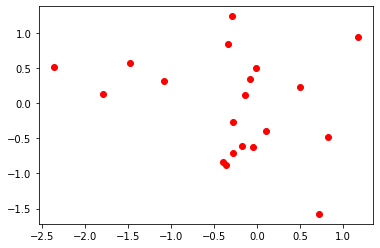

In [43]:
import matplotlib.pyplot as plt

#
# Generación de un tensor de 2x20 con valores aleatorios
#
a = tf.random.normal([2, 20])

#
# Cómputo
#
result = a.numpy()

#
# Se signan las columnas de la matriz a x y y
#
x, y = result

#
# Construye el gráfico
#
plt.scatter(x, y, color="red")
plt.show()

## Ragged Tensor

In [64]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9],
]

ragged_list

[[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]

In [65]:
x = tf.ragged.constant(ragged_list)

x, x.shape

(<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>,
 TensorShape([4, None]))

## Strings

In [66]:
tf.constant("Gray wolf")

<tf.Tensor: shape=(), dtype=string, numpy=b'Gray wolf'>

In [76]:
x = tf.strings.as_string(
    [
        [1, 2],
        [3, 4],
    ]
)

x

<tf.Tensor: shape=(2, 2), dtype=string, numpy=
array([[b'1', b'2'],
       [b'3', b'4']], dtype=object)>

In [77]:
tf.strings.to_number(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [79]:
x = tf.constant(
    [
        "Gray wolf",
        "Quick brown fox",
        "Lazy dog",
    ]
)

x

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Gray wolf', b'Quick brown fox', b'Lazy dog'], dtype=object)>

In [80]:
tf.strings.join(x)

<tf.Tensor: shape=(), dtype=string, numpy=b'Gray wolfQuick brown foxLazy dog'>

In [81]:
tf.strings.length(x)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 9, 15,  8], dtype=int32)>

In [82]:
tf.strings.lower(x)

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'gray wolf', b'quick brown fox', b'lazy dog'], dtype=object)>

In [83]:
tf.strings.upper(x)

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'GRAY WOLF', b'QUICK BROWN FOX', b'LAZY DOG'], dtype=object)>

In [84]:
tf.strings.strip(x)

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Gray wolf', b'Quick brown fox', b'Lazy dog'], dtype=object)>

In [85]:
text = tf.constant("1 10 100")
tf.strings.to_number(tf.strings.split(text, " "))

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([  1.,  10., 100.], dtype=float32)>